In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os




In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [3]:
df= pd.read_csv("Qualcomm_Stocks.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.shape

(5234, 7)

In [4]:
import matplotlib.pyplot as plt
import pandas_datareader as web
from matplotlib import pyplot as plt
plt.style.use('seaborn')

from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from keras.models import Sequential # Create Model
from keras.layers import Dense # Neurons
from keras.layers import LSTM # Long Short Term Memory
from sklearn.preprocessing import MinMaxScaler # Normalize
from sklearn.metrics import mean_squared_error # Loss Function
from sklearn.model_selection import train_test_split

/var/folders/qh/215l544s06x3_jp987f9gdgh0000gn/T/ipykernel_12295/2363375889.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [5]:
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,25.485001,26.025000,24.885000,26.025000,17.366922,18612800
2002-01-03,26.030001,26.670000,25.825001,25.990000,17.343565,22240000
2002-01-04,26.235001,26.290001,24.895000,25.205000,16.819725,38927400
2002-01-07,25.200001,25.209999,23.549999,23.600000,15.748687,40064600
2002-01-08,23.424999,24.290001,23.230000,24.094999,16.079002,56385400


In [6]:
scale = MinMaxScaler()
scalled = scale.fit_transform(df)
i = 0
for col in df.columns:
    df[col] = scalled[:,i]
    i += 1

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000
mean,0.269980,0.266499,0.275531,0.272403,0.235732,0.086722
std,0.187727,0.187621,0.189872,0.188465,0.197999,0.063805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155674,0.152310,0.158856,0.157549,0.111686,0.045658
50%,0.232122,0.227830,0.237693,0.234182,0.192281,0.070802
75%,0.314911,0.310068,0.321932,0.317888,0.271516,0.108567
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
x, y = df.drop('Volume', axis=1), df['Close']

In [10]:
data = df.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on
training_data_len

4188

In [11]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.079761  , 0.07956371, 0.07513881, 0.06609171, 0.06888193,
       0.06330149, 0.06465432, 0.064147  , 0.0659508 , 0.06425975,
       0.06130041, 0.066289  , 0.05975029, 0.04974494, 0.05577633,
       0.05625546, 0.06285054, 0.06099039, 0.0547617 , 0.0590175 ,
       0.05721372, 0.05273245, 0.0480257 , 0.04526367, 0.0474902 ,
       0.04329078, 0.0386404 , 0.04940672, 0.04720837, 0.05115414,
       0.04594008, 0.0384713 , 0.03824582, 0.03427186, 0.02466109,
       0.02522477, 0.03427186, 0.03105888, 0.02767678, 0.02677489,
       0.03444097, 0.04261435, 0.04258617, 0.04565824, 0.04985766,
       0.05650912, 0.05608636, 0.05307066, 0.04853302, 0.04698289,
       0.0514078 , 0.05625546, 0.05436713, 0.04639103, 0.05078775,
       0.04712382, 0.04430541, 0.04543276, 0.03979594, 0.03914771])]
[0.04393900985845388]



In [12]:
#convert the x_train and y_train  to numppy array
x_train,y_train = np.array(x_train), np.array(y_train)
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(4128, 60, 1)

**Long Short Term Memory**

In [13]:
#Buil the LSTM model
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
4128/4128 [==============================] - 26s 6ms/step - loss: 2.4668e-04
Epoch 2/10
4128/4128 [==============================] - 25s 6ms/step - loss: 8.6121e-05
Epoch 3/10
4128/4128 [==============================] - 26s 6ms/step - loss: 7.6472e-05
Epoch 4/10
4128/4128 [==============================] - 26s 6ms/step - loss: 6.0794e-05
Epoch 5/10
4128/4128 [==============================] - 26s 6ms/step - loss: 6.1764e-05
Epoch 6/10
4128/4128 [==============================] - 25s 6ms/step - loss: 5.6988e-05
Epoch 7/10
4128/4128 [==============================] - 26s 6ms/step - loss: 5.4895e-05
Epoch 8/10
4128/4128 [==============================] - 26s 6ms/step - loss: 5.0814e-05
Epoch 9/10
4128/4128 [==============================] - 25s 6ms/step - loss: 4.9405e-05
Epoch 10/10
4128/4128 [==============================] - 25s 6ms/step - loss: 4.9071e-05


In [15]:
test_data= scaled_data[training_data_len-60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [16]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(1046, 60, 1)

In [17]:
#predicting the data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

33/33 [==============================] - 0s 5ms/step


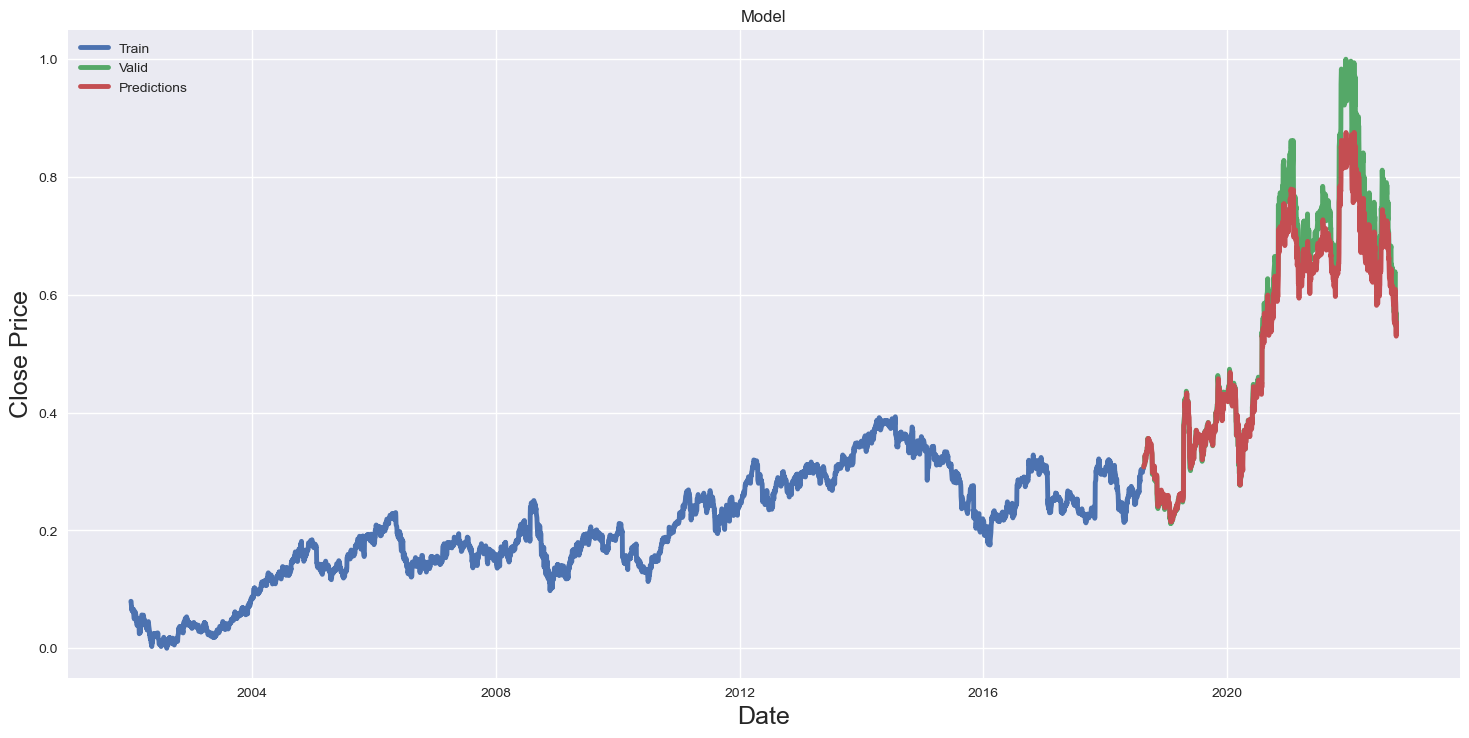

In [18]:
pd.options.mode.chained_assignment = None  # default='warn'
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'])

In [19]:
valid

,Close,Predictions
Date,,
2018-08-21,0.308193,0.307809
2018-08-22,0.309828,0.310081
2018-08-23,0.309941,0.311573
2018-08-24,0.311575,0.311715
2018-08-27,0.312646,0.313391
...,...,...
2022-10-10,0.579042,0.585836
2022-10-11,0.553282,0.555880
2022-10-12,0.545447,0.534993


In [20]:
#get the quote
coca_quote = pd.read_csv('Qualcomm_Stocks.csv')
#Create new data frame
new_df = coca_quote.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scaled the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days 
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
#get the predicted scaled price
pred_price= model.predict(X_test)
#undo the scalling
pred_price = scaler.inverse_transform(pred_price)
pred_price

1/1 [==============================] - 0s 11ms/step


array([[2.2752867]], dtype=float32)

In [21]:
#importing packages for the prediction of time-series data
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [22]:
import pandas as pd
import numpy as np
import math
import datetime as dt

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [23]:
df = pd.read_csv('Qualcomm_Stocks.csv', parse_dates=['Date'])
df1 = df[['Date','Close']]
df1.head(3)

,Date,Close
0,2002-01-02,26.025
1,2002-01-03,25.990
2,2002-01-04,25.205


In [24]:
# Setting the Date as Index
df_ts = df1.set_index('Date')
df_ts.sort_index(inplace=True)
print (type(df_ts))
print (df_ts.head(3))
print ("========================")
print (df_ts.tail(3))

<class 'pandas.core.frame.DataFrame'>
             Close
Date              
2002-01-02  26.025
2002-01-03  25.990
2002-01-04  25.205
                 Close
Date                  
2022-10-12  108.639999
2022-10-13  112.860001
2022-10-14  109.949997


<Axes: xlabel='Date'>

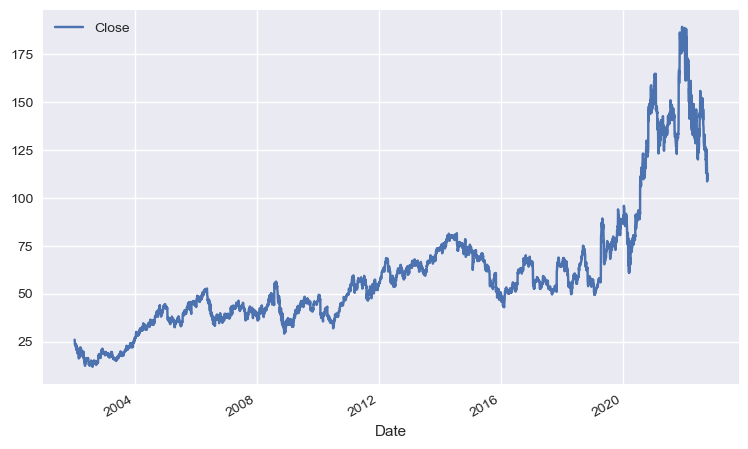

In [25]:
# Basic plot 
df_ts.plot()

In [26]:
# Dickey Fuller Test Function
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
    print ("==============================================")
    
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)
    

In [27]:
# Convert the DF to series first
ts = df_ts['Close']

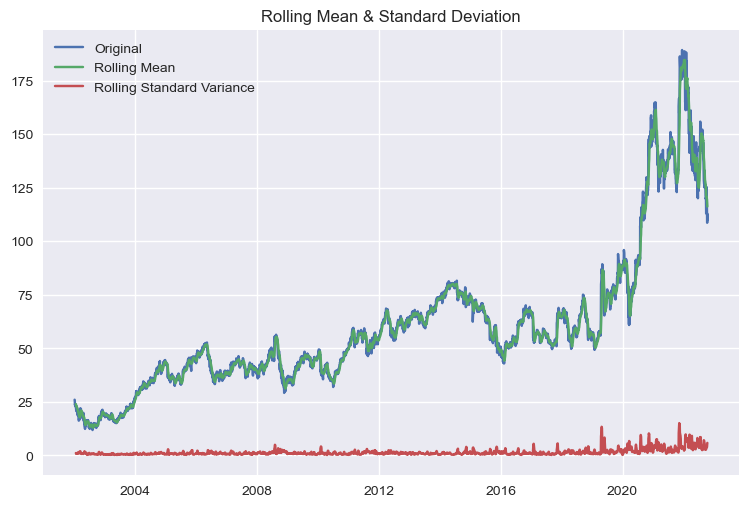

In [28]:
# Rolling Statistics
rolmean = ts.rolling(window=12).mean()
rolvar = ts.rolling(window=12).std()

plt.plot(ts, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolvar, label='Rolling Standard Variance')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [29]:
test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                   -1.487271
p-value                           0.539799
#lags Used                       25.000000
Number of Observations Used    5208.000000
Critical Value (1%)              -3.431606
Critical Value (5%)              -2.862095
Critical Value (10%)             -2.567065
dtype: float64


In [30]:
# Lets Resample the data by Month and analyze again
df_ts_m = df_ts.resample('M').mean()
print (type(df_ts_m))
print (df_ts_m.head(3))

<class 'pandas.core.frame.DataFrame'>
                Close
Date                 
2002-01-31  23.158809
2002-02-28  18.876053
2002-03-31  20.313750


In [31]:
tsm = df_ts_m['Close']
print (type(tsm))

<class 'pandas.core.series.Series'>


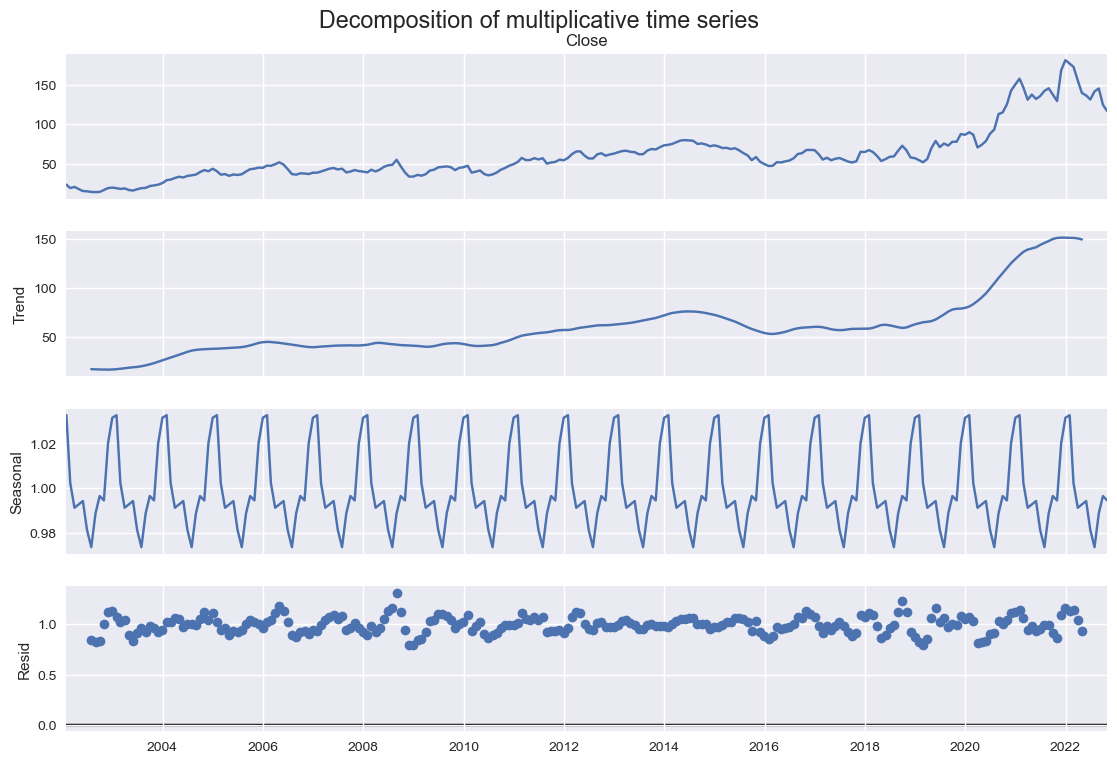

In [32]:
# Lets do a quick vanila decomposition to see any trend seasonality etc in the ts
decomposition = sm.tsa.seasonal_decompose(tsm, model='multiplicative')

fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [33]:
# lets try to make the "tsm" Stationary

tsmlog = np.log10(tsm)
tsmlog.dropna(inplace=True)

tsmlogdiff = tsmlog.diff(periods=1)
tsmlogdiff.dropna(inplace=True)
# Stationarity Check
test_stationarity(tsmlogdiff)

Results of Dickey-Fuller Test:
Test Statistic                -1.279152e+01
p-value                        7.060389e-24
#lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


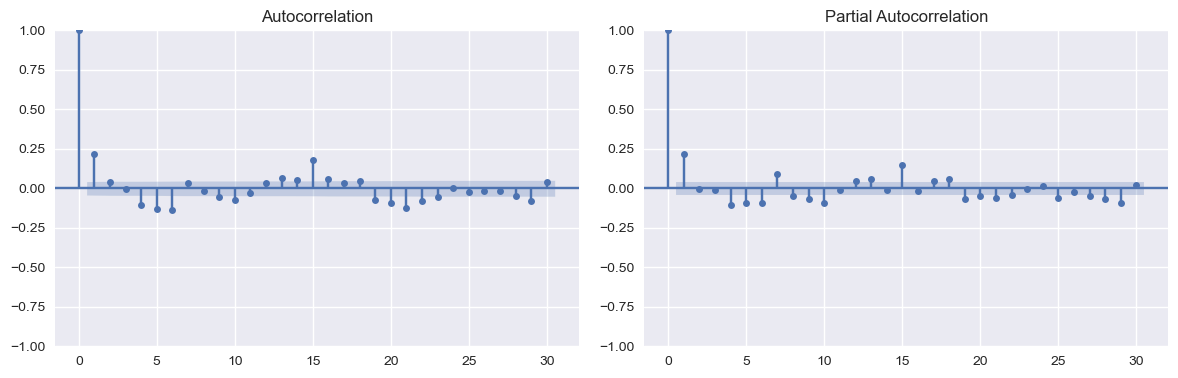

In [34]:
# Let's plot ACF & PACF graphs to visualize AR & MA components

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(tsmlogdiff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(tsmlogdiff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [ ]:
y_2019 = df.loc[(df['Date'] >= '2019-01-01')
                     & (df['Date'] < '2020-01-01')]
monthvise= y_2019.groupby(y_2019['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise


In [ ]:
y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2019.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2019, x=y_2019.Date, y=[y_2019['Open'], y_2019['Close'], 
                                          y_2019['High'], y_2019['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()